# Part 1

# Data Loading and Initial Exploration

## Part 1: Data Loading and Initial Exploration (15 pts)

The data for this project is stored in the `data` folder in your repositories, in the `SOTU.csv` file. The data file is structured as a CSV with columns for president name, speech text, year, and word count in the speech. 

In this section you will:

1. Import the data into a pandas dataframe
2. Perform exploratory data analysis (EDA) including specifically:
- Analyze the number of speeches per president
- Analyze the number of speeches per year
- Analyze the word count distribution
- Analyze the word count distribution accross years using a rug plot
- Analyze the average word count per president
3. Write commentary on your findings

### Read Data

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark') 

In [78]:
sotu = pd.read_csv('data/SOTU.csv')
sotu

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


In [79]:
display(sotu.isna().sum())
sotu[sotu.duplicated()]

President     0
Year          0
Text          0
Word Count    0
dtype: int64

,President,Year,Text,Word Count
46,Jimmy Carter,1980.0,"\nMr. President, Mr. Speaker, Members of the 9...",3395
48,Jimmy Carter,1979.0,"\nMr. President, Mr. Speaker, Members of the 9...",3186
50,Jimmy Carter,1978.0,"\nMr. President, Mr. Speaker, Members of the 9...",4448
55,Richard M. Nixon,1974.0,"\nMr. Speaker, Mr. President, my colleagues in...",5083
57,Richard M. Nixon,1972.0,"\nMr. Speaker, Mr. President, my colleagues in...",3854
75,Dwight D. Eisenhower,1956.0,\n[Recorded on film and tape and broadcast the...,1055
239,George Washington,1792.0,\nFellow-Citizens of the Senate and House of R...,2067
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


### Exploratory Data Analysis

#### Number of Speeches per President

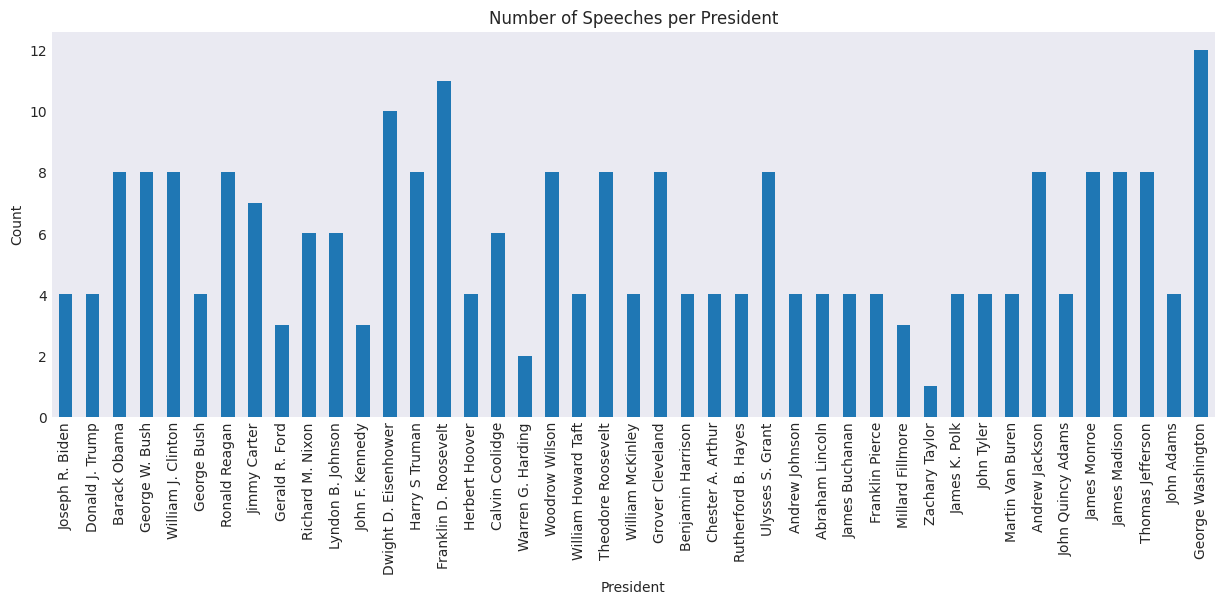

In [85]:
# get most recent year to later sort counts by year
most_recent_year = sotu.groupby('President')['Year'].max().sort_values(ascending=False)
# use value counts to get num of speeches
value_counts = sotu["President"].value_counts().reindex(most_recent_year.index)

# plot
fig, ax = plt.subplots(figsize=(15,5))
value_counts.plot(kind="bar", ax=ax)
ax.set_title("Number of Speeches per President")
ax.set_xlabel("President")
ax.set_ylabel("Count")
plt.savefig("outputs/number_of_speeches_per_prez.png")
plt.show()

From the plot, I see that George Washington has the most number of speeches. However, careful look into the dataset reveals that George Washington also has the most number of duplicated speeches in the dataset. This means that perhaps the number of speeches in the dataset is skewed and is not reflective of the true unique number of speeches for each president.

#### Number of Speeches per Year

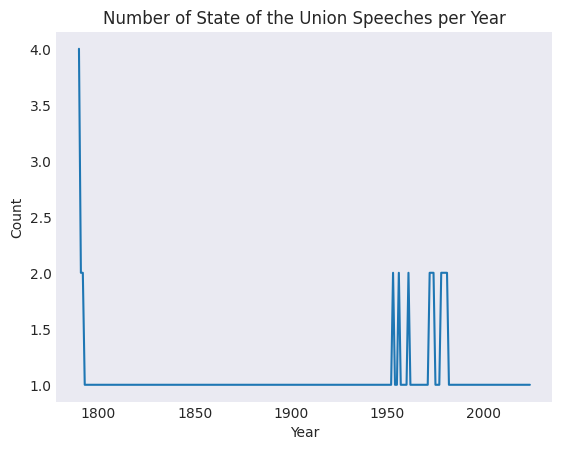

In [86]:
# get counts for each year
counts = sotu["Year"].value_counts().reset_index()
# sort counts by year
data = counts.sort_values('Year').reset_index()

# plot
fig, ax = plt.subplots()
ax.plot(data['Year'], data['count'])
ax.set_title("Number of State of the Union Speeches per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Count")
plt.savefig("outputs/number_of_speeches_per_year.png")
plt.show()

It seems like there is an unevent distribution of speeches across the years. The most number of speeches come from before the year 1800. After the year 1800, we only see an influx of speeches between the years 1950 and 2000. This shows that our dataset does not have the many speeches from 1800 to 1950. Additionally, there are not the many speeches in our dataset post 2000 in comparison to other years.

#### Word Count Distribution 

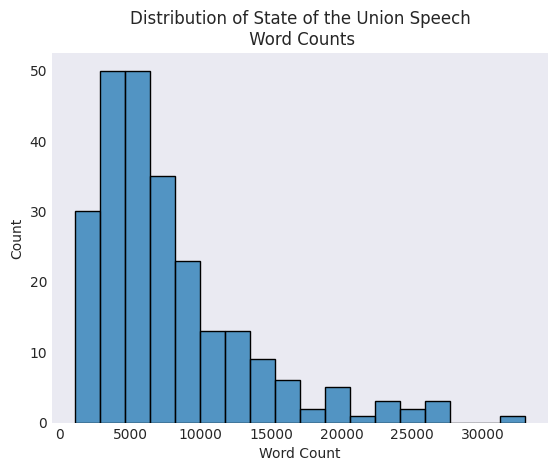

In [87]:
sns.histplot(data=sotu, x='Word Count')
plt.title('Distribution of State of the Union Speech\n Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.savefig("outputs/word_count_distribution.png")
plt.show()

Based on the histogram of word count for the state of the union speeches, the distribution seems to be skewed right. This means that it is rarer to have large word counts for a speech and we can see that from this plot. It is also interesting to see that there is a speech that has at least 30000 words. That must be a very long speech.

#### Word Count Distribution over Year

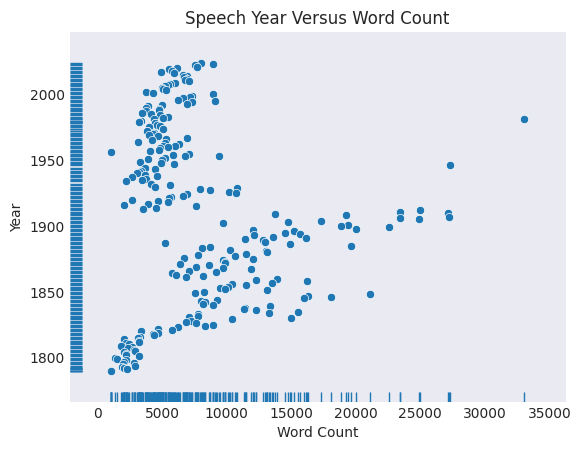

In [88]:
sns.scatterplot(data=sotu, x='Word Count', y='Year')
sns.rugplot(data=sotu, x='Word Count', y='Year')
plt.title('Speech Year Versus Word Count')
plt.xlabel('Word Count')
plt.ylabel('Year')
plt.savefig("outputs/word_count_distribution_per_year.png")
plt.show()

By looking at the word count distribution over each Year, we can see some trends and insights. We can see that in the early 1800s, the speeches had very low word counts. However as time went on, the word count for speeches started to increase until the year 1900. After 1900, speeches started to have a word count between about 5000 to 15000. However, there were some outliers as there were speeches with about 27500 words and 35000 words that occured in the 1950s and around the 1980s.

#### Word Count Distribution per President

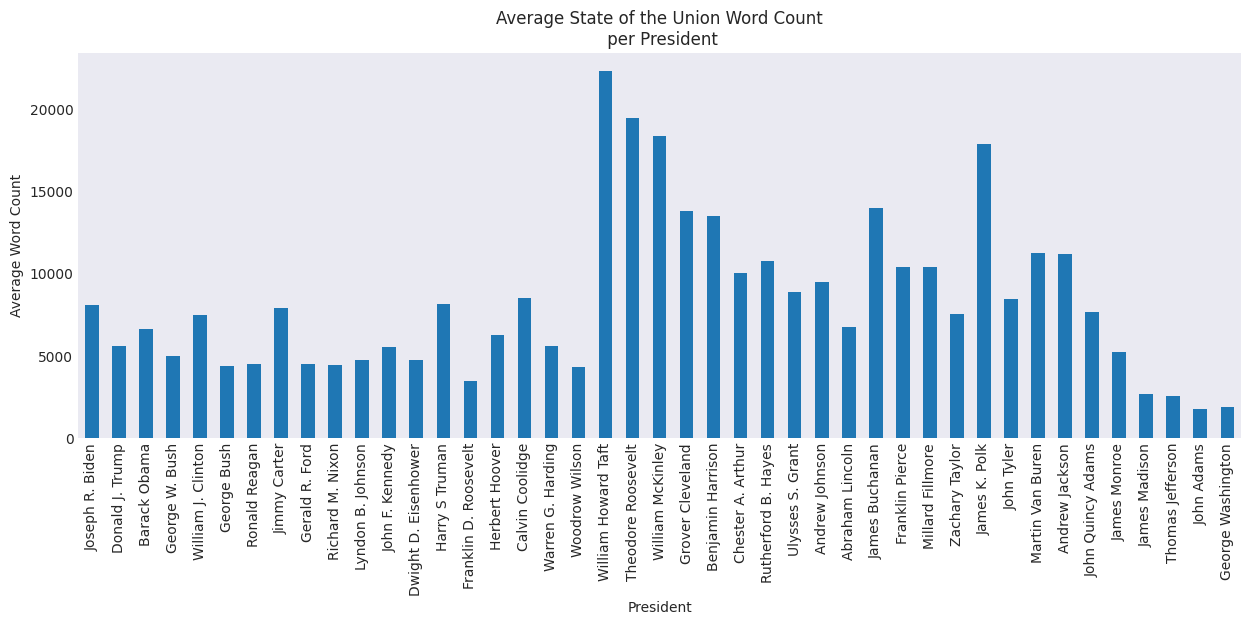

In [89]:
# get most recent year to later sort counts by year
most_recent_year = sotu.groupby('President')['Year'].max().sort_values(ascending=False)

avg_word_counts = sotu.groupby('President')['Word Count'].mean().reindex(most_recent_year.index)


# plot
fig, ax = plt.subplots(figsize=(15,5))
avg_word_counts.plot(kind="bar", ax=ax)
ax.set_title("Average State of the Union Word Count\n per President")
ax.set_xlabel("President")
ax.set_ylabel("Average Word Count")
plt.savefig("outputs/word_count_distribution_per_prez.png")
plt.show()

From this plot, it is interesting to see which president have a high average word count and which presidents tend to be brief with their speeches. We can see that George Washington and John Adams have very low average word counts which lead me to believe that their speeches were very short and brief. However, we can also see that William Howard Taft had a very high average word count which indicates that his speeches must have been wordy and verbose.